In [353]:
import pandas as pd
df = pd.read_csv('data.csv', 
                 names=['time', 'low', 'high', 'open', 'close', 'volume', 'tw_sentiment', 'tw_followers', 'reddit_sentiment']
                )
df.head()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment
0,1519997640,10969.0,10969.01,10969.01,10969.00,0.111542,0.195409,607130.0,0.113258
1,1519997700,10969.0,10969.00,10969.00,10969.00,0.504804,0.195409,607131.0,0.113258
2,1519997760,10965.0,10965.01,10965.00,10965.01,0.622844,0.195409,607135.0,0.113258
3,1519997820,10965.0,10965.00,10965.00,10965.00,0.036500,0.195408,607140.0,0.113258
4,1519997880,10964.8,10964.81,10964.81,10964.80,0.762078,0.195451,607349.0,0.113258


In [354]:
df.describe()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment
count,1.929000e+03,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1.929000e+03,1929.000000
mean,1.520055e+09,11196.413624,11198.745060,11197.567040,11197.648999,1.628746,0.074855,1.040759e+06,0.140443
std,3.341958e+04,215.172610,214.884686,215.013128,215.060250,2.069249,0.034484,2.961687e+05,0.025351
min,1.519998e+09,10765.000000,10786.810000,10785.010000,10782.000000,0.000111,0.018276,4.487650e+05,0.059554
25%,1.520027e+09,11009.990000,11010.000000,11009.990000,11010.000000,0.370464,0.051599,8.211350e+05,0.124603
50%,1.520055e+09,11288.960000,11290.310000,11290.000000,11289.990000,0.997550,0.069161,1.049516e+06,0.141128
75%,1.520084e+09,11360.000000,11364.340000,11361.000000,11364.000000,2.135097,0.100323,1.211071e+06,0.161146
max,1.520113e+09,11492.370000,11493.750000,11493.750000,11493.740000,23.988752,0.195451,1.707796e+06,0.176271


In [355]:
df.corr()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment
time,1.000000,0.922379,0.923085,0.922903,0.922647,-0.039636,0.112897,0.003666,0.349078
low,0.922379,1.000000,0.999660,0.999783,0.999858,-0.032766,0.216514,-0.159863,0.476695
high,0.923085,0.999660,1.000000,0.999855,0.999822,-0.022452,0.216551,-0.160007,0.476881
open,0.922903,0.999783,0.999855,1.000000,0.999683,-0.027548,0.216795,-0.160550,0.476985
close,0.922647,0.999858,0.999822,0.999683,1.000000,-0.027063,0.216517,-0.159444,0.476753
volume,-0.039636,-0.032766,-0.022452,-0.027548,-0.027063,1.000000,-0.050659,0.088833,-0.047155
tw_sentiment,0.112897,0.216514,0.216551,0.216795,0.216517,-0.050659,1.000000,-0.388980,0.361297
tw_followers,0.003666,-0.159863,-0.160007,-0.160550,-0.159444,0.088833,-0.388980,1.000000,-0.043630
reddit_sentiment,0.349078,0.476695,0.476881,0.476985,0.476753,-0.047155,0.361297,-0.043630,1.000000


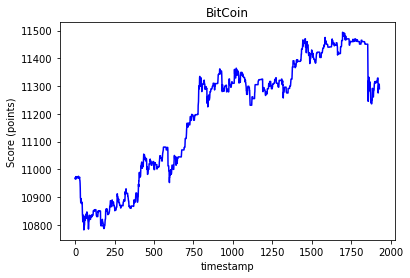

In [356]:
import matplotlib.pyplot as plt
plt.title("BitCoin")
plt.xlabel("timestamp")
plt.ylabel("Score (points)")
plt.plot(df['close'], 'b')
plt.show()

### OPEN

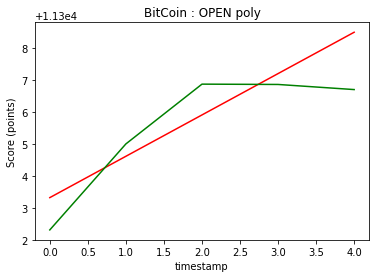

In [429]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

## 20 min
data_poly = df[-5:].reset_index()
X_poly = np.arange(len(data_poly)).reshape(-1, 1)
y_poly = data_poly['open'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_poly, test_size=0.2, shuffle=False)

model_poly_open = make_pipeline(PolynomialFeatures(1), Ridge())
model_poly_open.fit(X_train, y_train)

y_poly_predict = model_poly_open.predict(X_poly)

plt.title("BitCoin : OPEN poly")
plt.xlabel("timestamp")
plt.ylabel("Score (points)")
plt.plot(y_poly_predict, 'r')
plt.plot(data_poly["open"], 'g')
plt.show()

In [358]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [359]:
X = df[['open', 'reddit_sentiment', 'tw_sentiment', 'tw_followers']]
y = df['close'].values.reshape(-1, 1)

In [360]:
scalerX = MinMaxScaler(feature_range=(0, 1))
scalerY = MinMaxScaler(feature_range=(0, 1))
X_scale = scalerX.fit_transform(X)
y_scale = scalerY.fit_transform(y)

In [361]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_scale, test_size=0.2, shuffle=False)

In [362]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_train.shape

(1543, 1, 4)

In [363]:
np.random.seed(42)

model = Sequential()

model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('linear'))
model.summary()

model.compile(loss='mae', optimizer='adam')
model.fit(X_train, y_train, batch_size=X_train.shape[0], 
          epochs=300, validation_data=(X_test, y_test), shuffle=False, verbose=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 1, 100)            42000     
_________________________________________________________________
dropout_40 (Dropout)         (None, 1, 100)            0         
_________________________________________________________________
lstm_41 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_41 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 101       
_________________________________________________________________
activation_20 (Activation)   (None, 1)                 0         
Total params: 122,501
Trainable params: 122,501
Non-trainable params: 0
_________________________________________________________________


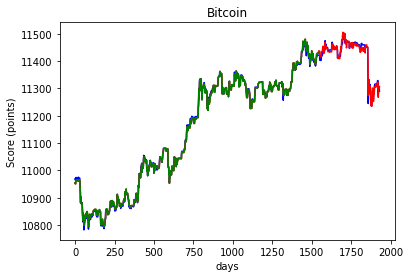

In [368]:
y_predict_train = model.predict(X_train)
y_predict_train = scalerY.inverse_transform(y_predict_train)

y_predict_test = model.predict(X_test)
y_predict_test = scalerY.inverse_transform(y_predict_test)

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_predict_train, y_predict_test), axis=0)

plt.title("Bitcoin")
plt.xlabel("days")
plt.ylabel("Score (points)")
plt.plot(df['close'], 'b')
plt.plot(y, 'r')
plt.plot(y_predict_train, 'g')
plt.show()

In [426]:
# LAST
last = df[['close', 'reddit_sentiment', 'tw_sentiment', 'tw_followers']][-1:]
X_hard = df[['close', 'reddit_sentiment', 'tw_sentiment', 'tw_followers']][-1:]
n = 0
yy = 0
while(n < 5):
    if yy == 0:
        yy = model.predict(np.reshape(last.values, (last.values.shape[0], 1, last.values.shape[1])))
        yy = scalerY.inverse_transform(yy)
    else:
        lastt = X_hard[-1:]
        yy = model.predict(np.reshape(lastt.values, (lastt.values.shape[0], 1, lastt.values.shape[1])))
        yy = scalerY.inverse_transform(yy)
    X_hard = X_hard.append({
        'close': yy[0][0],
        'reddit_sentiment': last['reddit_sentiment'].values[0],
        'tw_sentiment': last['tw_sentiment'].values[0],
        'tw_followers': last['tw_followers'].values[0],
    }, ignore_index=True)
    n = n + 1
X_hard.head()

,close,reddit_sentiment,tw_sentiment,tw_followers
0,11290.190000,0.137565,0.036506,1329383.0
1,11296.095703,0.137565,0.036506,1329383.0
2,11296.095703,0.137565,0.036506,1329383.0
3,11296.095703,0.137565,0.036506,1329383.0
4,11296.095703,0.137565,0.036506,1329383.0
